In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import sklearn
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import clear_output

InteractiveShell.ast_node_interactivity = "all"

## EDA

In [2]:
df = pd.read_csv('ffmemes_tgchannelru_stats.csv')
df2 = pd.read_csv('meme_features_ru.csv')

In [3]:
df2.shape
df2.dropna(axis=0).shape

df.shape
df.dropna(axis=0).shape

# all values are non-null

(64357, 12)

(64357, 12)

(15074, 7)

(15074, 7)

### Format channel of memes

Analysis of channel of memes

In [4]:
tshares = df.groupby("meme_id").views.sum()
tviews = df.groupby("meme_id").shares.sum()

y_memes = df.loc[
    df.groupby("meme_id")["time"].idxmin()
]  # remove duplicates with replacement for earliest time

y_memes = y_memes.drop(columns=["views", "shares", "chat_id", 'message_id'])
y_memes = pd.merge(y_memes, tviews, on="meme_id")
y_memes = pd.merge(y_memes, tshares, on="meme_id")
y_memes
y_memes.to_csv("formatted_ff_tgchannelru_stats.csv", index=False)
# Convert 'time' to datetime if necessary

y_memes["time"] = pd.to_datetime(y_memes["time"], unit="ms")
y_memes

,time,text,meme_id,shares,views
0,1709424000000,🤖 [__Fast Food Memes](https://t.me/ffmemesbot?...,874731,9,1232
1,1709424000000,🤖 [__Fast Food Memes](https://t.me/ffmemesbot?...,962706,19,1228
2,1709510400000,🩵 [__Fast Food Memes](https://t.me/ffmemesbot?...,974985,11,1200
3,1709424000000,🪪 [__Fast Food Memes](https://t.me/ffmemesbot?...,978735,21,1297
4,1709424000000,🪺 [__Fast Food Memes](https://t.me/ffmemesbot?...,998981,30,1301
...,...,...,...,...,...
394,1715299200000,🧆 [__Fast Food Memes](https://t.me/ffmemesbot?...,7809865,11,883
395,1715299200000,🧖🏻‍♂️ [__Fast Food Memes](https://t.me/ffmemes...,7825151,17,871
396,1715212800000,🪂 [__Fast Food Memes](https://t.me/ffmemesbot?...,7829335,16,929
397,1715212800000,🤺 [__Fast Food Memes](https://t.me/ffmemesbot?...,7972479,29,903


,time,text,meme_id,shares,views
0,2024-03-03,🤖 [__Fast Food Memes](https://t.me/ffmemesbot?...,874731,9,1232
1,2024-03-03,🤖 [__Fast Food Memes](https://t.me/ffmemesbot?...,962706,19,1228
2,2024-03-04,🩵 [__Fast Food Memes](https://t.me/ffmemesbot?...,974985,11,1200
3,2024-03-03,🪪 [__Fast Food Memes](https://t.me/ffmemesbot?...,978735,21,1297
4,2024-03-03,🪺 [__Fast Food Memes](https://t.me/ffmemesbot?...,998981,30,1301
...,...,...,...,...,...
394,2024-05-10,🧆 [__Fast Food Memes](https://t.me/ffmemesbot?...,7809865,11,883
395,2024-05-10,🧖🏻‍♂️ [__Fast Food Memes](https://t.me/ffmemes...,7825151,17,871
396,2024-05-09,🪂 [__Fast Food Memes](https://t.me/ffmemesbot?...,7829335,16,929
397,2024-05-09,🤺 [__Fast Food Memes](https://t.me/ffmemesbot?...,7972479,29,903


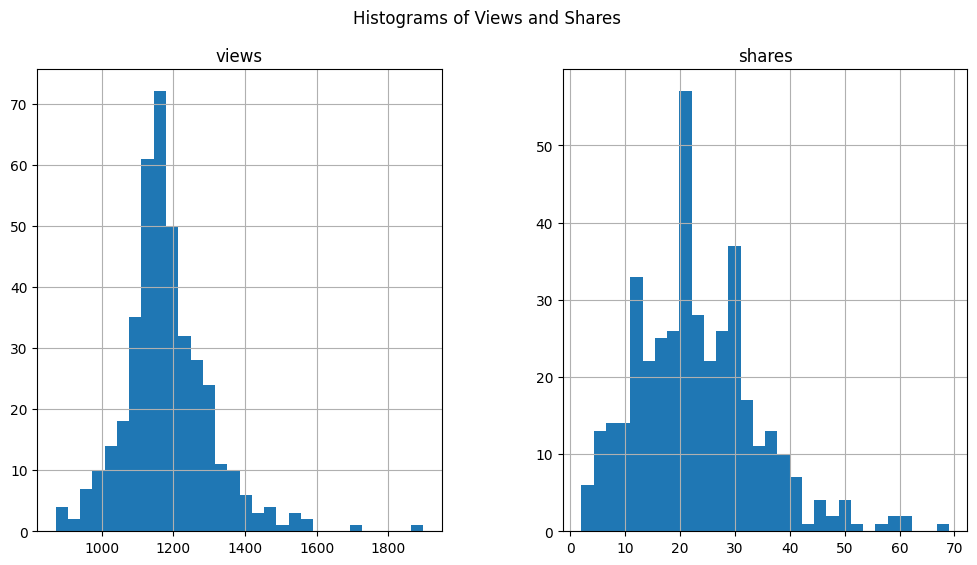

Correlation between views and shares: 0.5034382121931904


In [5]:
correlation = y_memes['views'].corr(y_memes['shares'])

y_memes[['views', 'shares']].hist(bins=30, figsize=(12, 6))
plt.suptitle('Histograms of Views and Shares')

clear_output()
plt.show()
print(f'Correlation between views and shares: {correlation}')


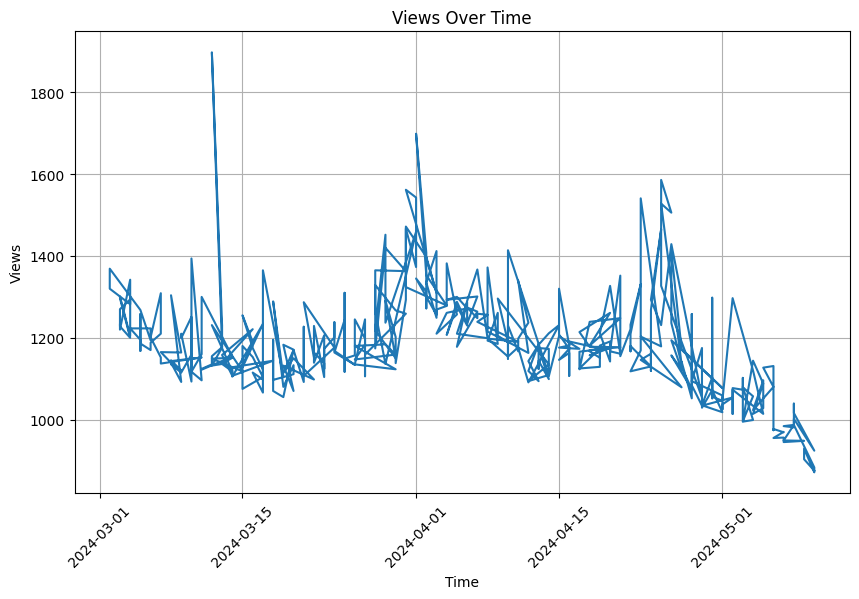

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(y_memes['time'], y_memes['views'])
plt.title('Views Over Time')
plt.xlabel('Time')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.show();

In [7]:
y_memes.sort_values(by='time', inplace=True)

In [8]:
window_size = 30 
rolling_mean = y_memes['views'].rolling(window=window_size).mean()
rolling_std = y_memes['views'].rolling(window=window_size).std()

# Define a threshold for considering a drop significant
# Here, we use the mean minus two standard deviations as a simple heuristic
threshold = rolling_mean - rolling_std

# Filter for significant drops memes
significant_drops = y_memes[(y_memes['views'] <= threshold)]
drop_density = significant_drops.groupby('time').time.count().sort_values(ascending=False)
drop_density

time
2024-04-12    5
2024-05-07    5
2024-03-08    5
2024-04-08    4
2024-04-29    4
2024-05-10    4
2024-05-09    3
2024-03-09    3
2024-05-06    3
2024-04-09    3
2024-04-10    3
2024-04-11    3
2024-04-14    3
2024-03-10    3
2024-03-19    2
2024-04-05    2
2024-05-03    2
2024-04-27    2
2024-04-28    2
2024-05-01    1
2024-05-04    1
2024-05-02    1
2024-04-22    1
2024-03-20    1
2024-04-13    1
2024-03-11    1
2024-03-18    1
2024-03-30    1
2024-03-27    1
2024-03-07    1
Name: time, dtype: int64

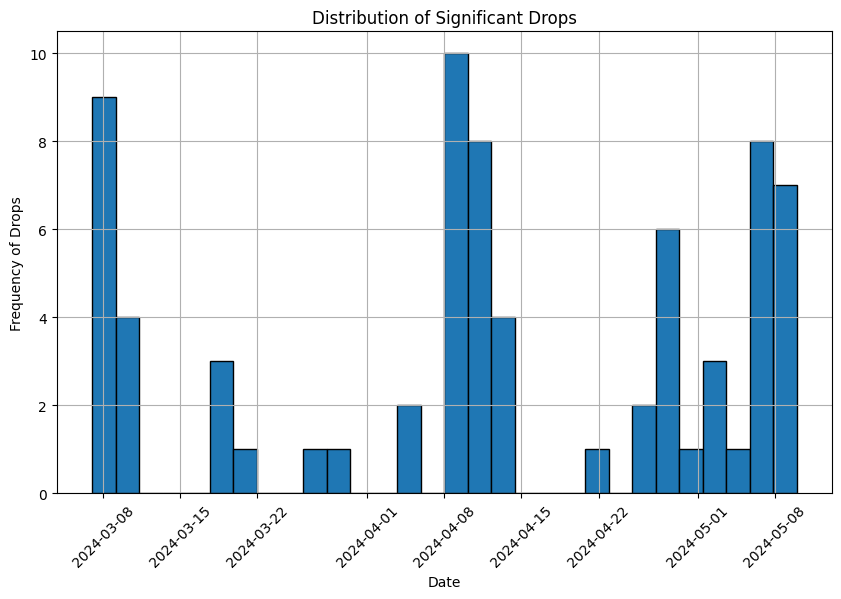

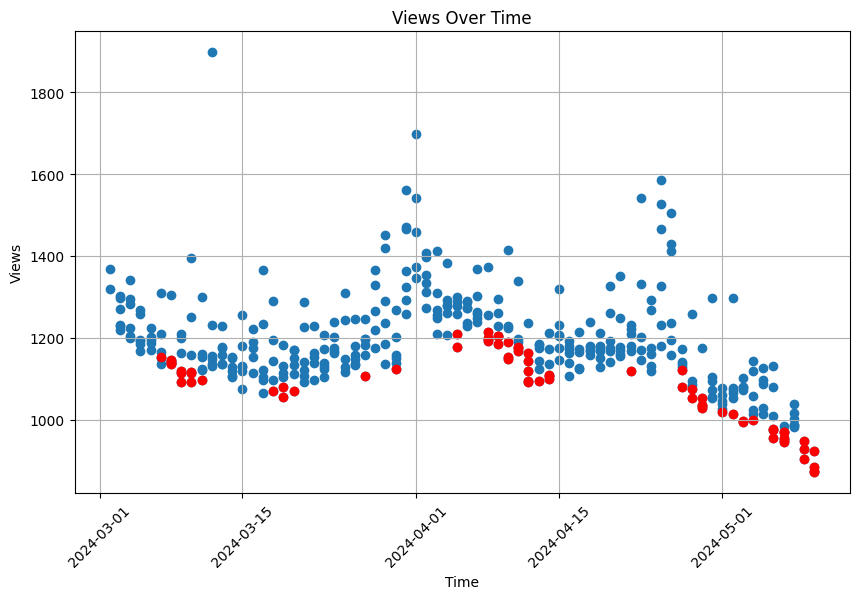

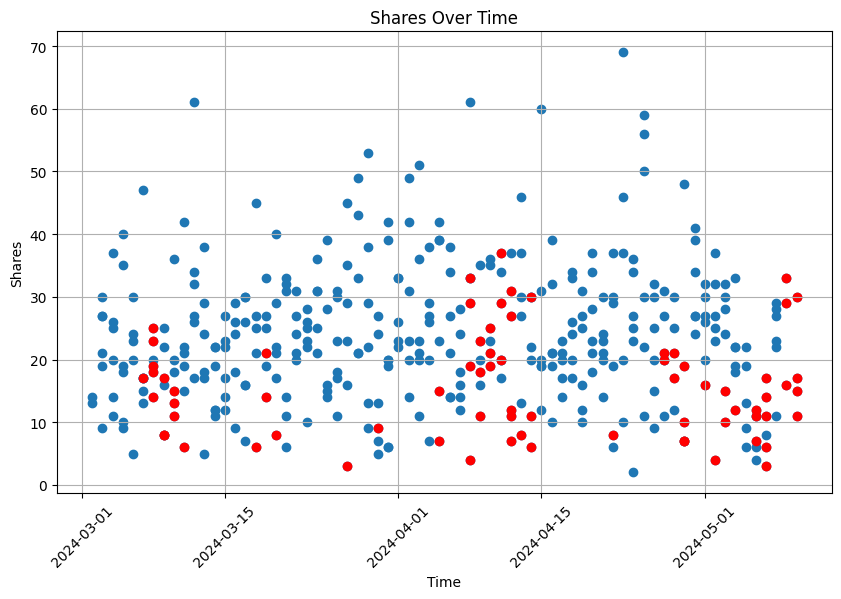

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(significant_drops['time'], bins=30, edgecolor='black')  
plt.title('Distribution of Significant Drops')
plt.xlabel('Date')
plt.ylabel('Frequency of Drops')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_memes['time'], y_memes['views'])
plt.scatter(significant_drops['time'], significant_drops['views'], color='red')
plt.title('Views Over Time')
plt.xlabel('Time')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_memes['time'], y_memes['shares'])
plt.scatter(significant_drops['time'], significant_drops['shares'], color='red')
plt.title('Shares Over Time')
plt.xlabel('Time')
plt.ylabel('Shares')
plt.xticks(rotation=45)
plt.grid(True)
plt.show();

- From drop_density and plot, we can find the threshold of timeline when memes not enough "mature", not stuck in __views__  and __shares__ growth
- Low views and low shares not affected to each other

In [10]:
Y = y_memes[y_memes['time'] <= '2024-04-29']

## Preparing dataset X, y for **views** and **shares**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df2[df2['meme_id'].isin(Y['meme_id'])]

In [13]:
X.sort_values(by=['meme_id'], inplace=True)
Y.sort_values(by=['meme_id'], inplace=True)

/var/folders/0_/rw0q19mn7hq3c2rsyy739y9m0000gn/T/ipykernel_68647/2575709393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.sort_values(by=['meme_id'], inplace=True)
/var/folders/0_/rw0q19mn7hq3c2rsyy739y9m0000gn/T/ipykernel_68647/2575709393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.sort_values(by=['meme_id'], inplace=True)


In [14]:
Y = Y.drop(columns=['text', 'meme_id']) # not sure
X = X.drop(columns=['meme_id'])
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

In [15]:
X.to_csv("final_meme_features.csv", index=False)
Y.to_csv("final_meme_targets.csv", index=False)
Y = Y.drop(columns=['time']) # not sure

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)
views_train = y_train['views']
views_test = y_test['views']

## More EDA

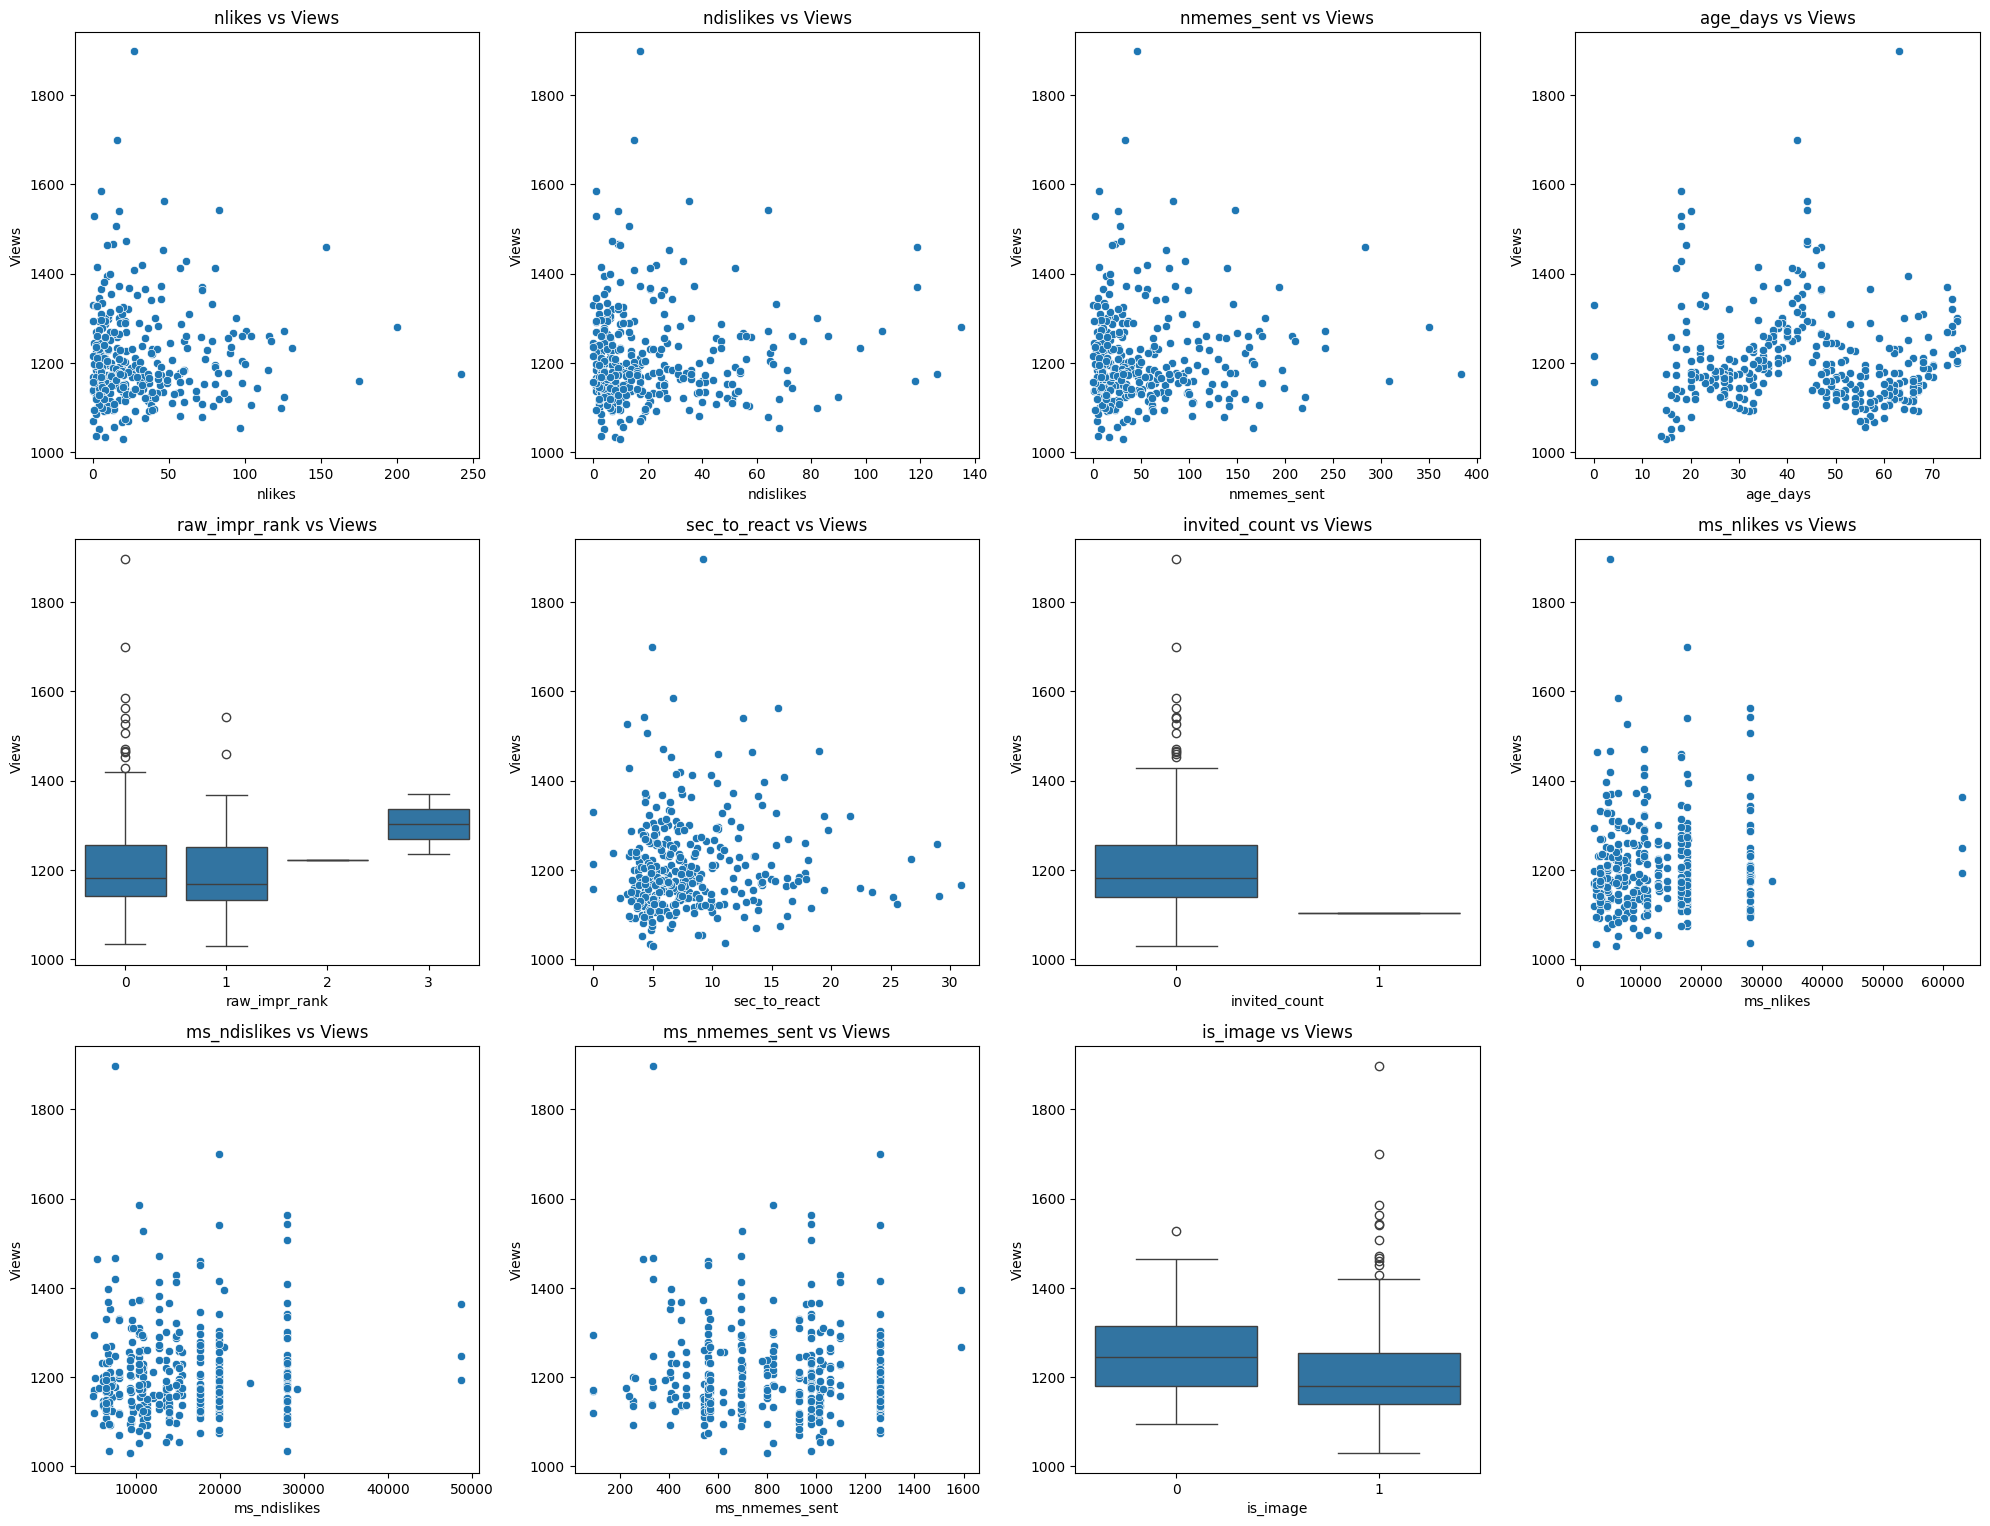

In [17]:
def plot_feature_in_grid(feature_name, ax):
    sns.scatterplot(x=X[feature_name], y=Y["views"], ax=ax)
    ax.set_title(f"{feature_name} vs Views")
    ax.set_xlabel(feature_name)
    ax.set_ylabel("Views")


def plot_aggregated_boolean_feature(feature_name, ax):
    # Create a new subplot if ax is None
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))  # Adjust size as needed

    # Plot the boxplot
    sns.boxplot(x=X[feature_name], y=Y["views"], ax=ax)
    ax.set_title(f"{feature_name} vs Views")
    ax.set_xlabel(feature_name)
    ax.set_ylabel("Views")

    if ax is None:
        plt.show()
    return ax


# Determine the number of rows and columns for the grid
num_rows = (
    int(len(X.columns) ** 0.5) + 1
)  # Square root of the number of features plus one
num_cols = num_rows

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature against shares in the grid
for i, col in enumerate(X.columns):
    un = len(X[col].unique())
    if un <= 10:
        plot_aggregated_boolean_feature(col, axes[i])
    else:
        plot_feature_in_grid(col, axes[i])

# Remove unused subplots
for i in range(i + 1, len(axes)):
    fig.delaxes(axes[i])

# Show the plot
plt.tight_layout()
plt.show();

## Models to predict __views__

### Linear model

In [18]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=True)
reg1 = reg.fit(X_train_scaled, views_train)
reg2 = reg.fit(X_train, views_train)

In [20]:
reg2.coef_
reg2.intercept_

array([ 4.58150126e+00,  4.28682575e+00, -4.16016748e+00, -3.81776922e-01,
        7.09322050e+00,  7.05544736e-01, -9.70288623e+01, -2.04220696e-03,
        3.59838854e-03, -9.03447493e-03, -6.97789794e+01])

1255.4213004781166

In [21]:
views_pred = reg2.predict(X_test)
print('Reg without scalling\n', r2_score(views_test, views_pred))
views_train_pred = reg2.predict(X_train)
print(r2_score(views_train, views_train_pred))

X_test_scaled = scaler.transform(X_test)
views_pred = reg1.predict(X_test)
print('Reg with scalling\n', r2_score(views_test, views_pred))
views_train_pred = reg1.predict(X_train)
print(r2_score(views_train, views_train_pred))

Reg without scalling
 -0.022583596502082415
0.04158291167624839
Reg with scalling
 -0.022583596502082415
0.04158291167624839


### Dicision Trees algorithms

from sklearn.tree import DecisionTreeRegressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
tree_regr = DecisionTreeRegressor().fit(X_train, views_train)
views_pred_tree_test = tree_regr.predict(X_test)
views_pred_tree_train = tree_regr.predict(X_train)
print(r2_score(views_test, views_pred_tree_test))
print(r2_score(views_train, views_pred_tree_train))

-0.6424438666985595
1.0


In [24]:
from sklearn.model_selection import cross_validate, GridSearchCV

In [25]:
params = {
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_leaf": [1, 2, 5, 50, 100, 1000],
    "min_samples_split": [10, 20, 100, 1000, 200, 400, 500,],
}
tree_regr = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree_regr, params, cv=4, scoring="r2")
grid_search.fit(X_train, views_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 5, 50, 100, 1000],
                         'min_samples_split': [10, 20, 100, 1000, 200, 400,
                                               500]},
             scoring='r2')

In [26]:
grid_search.best_params_
grid_search.best_score_
tree1 = grid_search.best_estimator_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 100}

0.14221067735347323

In [27]:
# Feature Importance

prep = tree1.predict(X_test)
r2_score(views_test, prep)

df_feat = pd.DataFrame()
df_feat['Feature'] = X.columns
df_feat['Importance'] = tree1.feature_importances_
df_feat.sort_values(by=['Importance'], ascending=False)

0.20499320280228128

,Feature,Importance
3,age_days,0.785416
9,ms_nmemes_sent,0.107398
10,is_image,0.107186
0,nlikes,0.000000
1,ndislikes,0.000000
2,nmemes_sent,0.000000
4,raw_impr_rank,0.000000
5,sec_to_react,0.000000
6,invited_count,0.000000
7,ms_nlikes,0.000000


### Ensemble algorithms

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [29]:
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

rf_params = {
    "n_estimators": [50, 100, 150, 250],
    "max_depth": [5, 10, 15, None],
    "min_samples_leaf": [2, 5, 20],
}
gb_params = {
    "n_estimators": [20, 50, 100, 150, 250],
    "max_depth": [5, 10, 15, None],
    "min_samples_leaf": [2, 5, 20],
    "learning_rate": [0.001, 0.01, 0.1, 0.5],
}

grid_search_rf = GridSearchCV(rf, rf_params, cv=4, scoring="r2")
grid_search_gb = GridSearchCV(gb, gb_params, cv=4, scoring="r2")

grid_search_rf.fit(X_train, views_train)
grid_search_gb.fit(X_train, views_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [2, 5, 20],
                         'n_estimators': [50, 100, 150, 250]},
             scoring='r2')

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [2, 5, 20],
                         'n_estimators': [20, 50, 100, 150, 250]},
             scoring='r2')

In [30]:
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

views_pred_rf = best_rf.predict(X_test)
views_pred_gb = best_gb.predict(X_test)

print(r2_score(views_test, views_pred_rf))
print(r2_score(views_test, views_pred_gb))

0.29855751376265205
0.20174336625420697


In [31]:
import joblib
joblib.dump(best_rf, "views_rf.joblib")

['views_rf.joblib']

In [32]:
views_pred_ens_2 = [np.mean([views_pred_rf[i], views_pred_gb[i]]) for i in range(len(y_test))]
print(r2_score(views_test, views_pred_ens_2))

0.26105528942360945


### Catboost

In [33]:
import catboost as cb
train_dataset = cb.Pool(X_train, views_train) 
test_dataset = cb.Pool(X_test, views_test)

In [34]:
model = cb.CatBoostRegressor(loss_function='RMSE')
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 1176.9228375	test: 1180.8124059	best: 1180.8124059 (0)	total: 71.8ms	remaining: 7.11s
1:	learn: 1142.0264892	test: 1145.8995283	best: 1145.8995283 (1)	total: 74.3ms	remaining: 3.64s
2:	learn: 1108.1520038	test: 1112.0112423	best: 1112.0112423 (2)	total: 74.8ms	remaining: 2.42s
3:	learn: 1075.3234414	test: 1079.2408215	best: 1079.2408215 (3)	total: 76.7ms	remaining: 1.84s
4:	learn: 1043.4882623	test: 1047.4938695	best: 1047.4938695 (4)	total: 80ms	remaining: 1.52s
5:	learn: 1012.5897090	test: 1016.6494779	best: 1016.6494779 (5)	total: 87ms	remaining: 1.36s
6:	learn: 982.6203691	test: 986.7297269	best: 986.7297269 (6)	total: 88.6ms	remaining: 1.18s
7:	learn: 953.5615590	test: 957.6750152	best: 957.6750152 (7)	total: 90.3ms	remaining: 1.04s
8:	learn: 925.4063817	test: 929.5540453	best: 929.5540453 (8)	total: 90.6ms	remaining: 916ms
9:	learn: 898.0770866	test: 902.2106961	best: 902.2106961 (9)	total: 92ms	remaining: 828ms
10:	learn: 871.5887125	test: 875.9290180	best: 875.9290180

{'params': {'depth': 2,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5,
  'iterations': 100},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [35]:
pred = model.predict(X_test)
r2 = r2_score(views_test, pred)
print("Testing performance")
r2

Testing performance


0.19215994004267878

In [36]:
df_feat = pd.DataFrame()
df_feat['Feature'] = X.columns
df_feat['Importance'] = model.feature_importances_.argsort()
df_feat.sort_values(by=['Importance'], ascending=False)

,Feature,Importance
4,raw_impr_rank,10
9,ms_nmemes_sent,9
6,invited_count,8
7,ms_nlikes,7
0,nlikes,6
8,ms_ndislikes,5
1,ndislikes,4
10,is_image,3
2,nmemes_sent,2
5,sec_to_react,1
